# Import package 

In [1]:
import numpy as np
import pandas as pd
import glob
import re
import os
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from matplotlib.pylab import rcParams
import seaborn
%matplotlib inline

## Set dataset path

In [2]:
path=glob.glob('/project/xt121-group5/scene2_data/*/*')

In [3]:
data=pd.DataFrame()
for file in path:
    tmp=pd.read_csv(file)
    tmp['source']=file.split('/')[-2]
    data=pd.concat([data,tmp],axis=0)

## Check few row data

In [4]:
data.head()

RecordTime  FaceBoundingBox_X  FaceBoundingBox_Y  FaceBoundingBox_W  \
0  2023-05-01 232058                524                166                253   
1  2023-05-01 232058                525                161                255   
2  2023-05-01 232058                525                163                255   
3  2023-05-01 232058                526                168                255   
4  2023-05-01 232058                530                174                249   

   FaceBoundingBox_H  FaceLandmarks_1_X  FaceLandmarks_1_Y  FaceLandmarks_2_X  \
0                253                632                257                602   
1                255                634                254                603   
2                255                634                256                604   
3                255                639                268                612   
4                249                642                276                618   

   FaceLandmarks_2_Y  FaceLandmarks_3_X  ...  EyeLandmarks_4_Y  \
0                255                679  ...               256   
1                252                681  ...               252   
2                255                681  ...               254   
3                266                681  ...               266   
4                274                678  ...               272   

   LeftEyeMidPoint_X  LeftEyeMidPoint_Y  RightEyeMidPoint_X  \
0              617.0              256.0               693.5   
1              618.5              253.0               696.0   
2              619.0              255.5               695.5   
3              625.5              267.0               694.0   
4              630.0              275.0               689.5   

   RightEyeMidPoint_Y  GazeVector_X  GazeVector_Y  GazeVector_Z  RecordType  \
0               257.0     -0.094805     -0.014327     -0.995393           0   
1               253.0     -0.047574     -0.034673     -0.998266           0   
2               255.0      0.012142     -0.065674     -0.997767           0   
3               267.0     -0.003677     -0.079957     -0.996792           0   
4               273.5      0.000000      0.000000      0.000000           0   

   source  
0   alice  
1   alice  
2   alice  
3   alice  
4   alice  

[5 rows x 105 columns]

In [20]:
data.shape

(7361, 105)

## check all col statistics

In [5]:
data.describe()

FaceBoundingBox_X  FaceBoundingBox_Y  FaceBoundingBox_W  \
count        7361.000000        7361.000000        7361.000000   
mean          460.235158         163.923923         395.241679   
std            52.487087          51.376960         100.966445   
min           134.000000          46.000000          55.000000   
25%           421.000000         151.000000         313.000000   
50%           467.000000         164.000000         366.000000   
75%           503.000000         200.000000         498.000000   
max           606.000000         573.000000         548.000000   

       FaceBoundingBox_H  FaceLandmarks_1_X  FaceLandmarks_1_Y  \
count        7361.000000        7361.000000        7361.000000   
mean          395.241679         616.108137         318.769461   
std           100.966445          44.901904          79.529218   
min            55.000000         155.000000         160.000000   
25%           313.000000         593.000000         261.000000   
50%           366.000000         619.000000         341.000000   
75%           498.000000         643.000000         379.000000   
max           548.000000         766.000000         599.000000   

       FaceLandmarks_2_X  FaceLandmarks_2_Y  FaceLandmarks_3_X  \
count        7361.000000        7361.000000        7361.000000   
mean          566.323054         317.701535         694.489743   
std            47.584987          79.283899          49.990632   
min           151.000000         157.000000         161.000000   
25%           533.000000         264.000000         665.000000   
50%           574.000000         335.000000         697.000000   
75%           599.000000         377.000000         732.000000   
max           703.000000         602.000000         863.000000   

       FaceLandmarks_3_Y  ...  EyeLandmarks_4_X  EyeLandmarks_4_Y  \
count        7361.000000  ...       7361.000000       7361.000000   
mean          315.535661  ...        743.613504        310.762125   
std            77.286629  ...         58.403310         74.464210   
min           164.000000  ...        164.000000        166.000000   
25%           257.000000  ...        700.000000        254.000000   
50%           336.000000  ...        747.000000        328.000000   
75%           373.000000  ...        785.000000        368.000000   
max           595.000000  ...        923.000000        593.000000   

       LeftEyeMidPoint_X  LeftEyeMidPoint_Y  RightEyeMidPoint_X  \
count        7361.000000        7361.000000         7361.000000   
mean          591.215596         318.235498          719.051623   
std            45.541752          79.368422           53.732235   
min           153.000000         158.500000          162.500000   
25%           562.000000         262.500000          682.500000   
50%           599.000000         338.500000          723.000000   
75%           621.000000         378.000000          756.000000   
max           734.500000         600.500000          893.000000   

       RightEyeMidPoint_Y  GazeVector_X  GazeVector_Y  GazeVector_Z  \
count         7361.000000   7361.000000   7361.000000   7361.000000   
mean           313.148893      0.007743     -0.140898     -0.805367   
std             75.851076      0.208422      0.165617      0.338508   
min            165.000000     -0.905315     -0.475392     -0.999838   
25%            256.000000     -0.031557     -0.253961     -0.984447   
50%            332.000000      0.014170     -0.131498     -0.945279   
75%            371.000000      0.093509     -0.030430     -0.893515   
max            594.000000      0.794163      0.449844      0.000000   

        RecordType  
count  7361.000000  
mean      0.428339  
std       0.494872  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 103 columns]

In [6]:
# observe the categorical data
data.describe(include=['O'])  # string stype data

RecordTime source
count                7361   7361
unique                307      5
top     2023-05-05 151400  jason
freq                   31   3323

## Count dataset by [RecodType,source] 

In [7]:
data[['source','RecordType']].groupby('source')['RecordType'].value_counts()

source       RecordType
alice        0              420
             1              412
charlie      0             1097
             1              655
charlie_old  1              360
             0              320
jason        0             1902
             1             1421
larry        0              469
             1              305
Name: RecordType, dtype: int64

# Check all colums hist

In [8]:
fig=data.hist(column=[x for x in data.columns if x not in ('RecordTime','RecordType', 'source')] ,layout=(11,11),bins=25,figsize=(200,200))

## Check all columns corr 

In [9]:
data.corr()

FaceBoundingBox_X  FaceBoundingBox_Y  FaceBoundingBox_W  \
FaceBoundingBox_X            1.000000          -0.383327          -0.710510   
FaceBoundingBox_Y           -0.383327           1.000000           0.329467   
FaceBoundingBox_W           -0.710510           0.329467           1.000000   
FaceBoundingBox_H           -0.710510           0.329467           1.000000   
FaceLandmarks_1_X            0.670251          -0.207682           0.016669   
...                               ...                ...                ...   
RightEyeMidPoint_Y          -0.576550           0.881504           0.719724   
GazeVector_X                -0.058403           0.049190           0.252225   
GazeVector_Y                 0.538436          -0.236487          -0.493638   
GazeVector_Z                 0.125139           0.392115          -0.176587   
RecordType                   0.110956          -0.339688           0.150101   

                    FaceBoundingBox_H  FaceLandmarks_1_X  FaceLandmarks_1_Y  \
FaceBoundingBox_X           -0.710510           0.670251          -0.593244   
FaceBoundingBox_Y            0.329467          -0.207682           0.902249   
FaceBoundingBox_W            1.000000           0.016669           0.693208   
FaceBoundingBox_H            1.000000           0.016669           0.693208   
FaceLandmarks_1_X            0.016669           1.000000          -0.130678   
...                               ...                ...                ...   
RightEyeMidPoint_Y           0.719724          -0.080326           0.995064   
GazeVector_X                 0.252225           0.314099           0.155881   
GazeVector_Y                -0.493638           0.223365          -0.418079   
GazeVector_Z                -0.176587          -0.010545           0.229932   
RecordType                   0.150101           0.324530          -0.192937   

                    FaceLandmarks_2_X  FaceLandmarks_2_Y  FaceLandmarks_3_X  \
FaceBoundingBox_X            0.867564          -0.592083           0.274782   
FaceBoundingBox_Y           -0.320320           0.915089          -0.034858   
FaceBoundingBox_W           -0.314272           0.668195           0.465291   
FaceBoundingBox_H           -0.314272           0.668195           0.465291   
FaceLandmarks_1_X            0.939714          -0.156526           0.886045   
...                               ...                ...                ...   
RightEyeMidPoint_Y          -0.322536           0.987789           0.249105   
GazeVector_X                 0.196911           0.139260           0.389832   
GazeVector_Y                 0.380118          -0.408303          -0.021623   
GazeVector_Z                 0.046048           0.232418          -0.098020   
RecordType                   0.271598          -0.211970           0.344740   

                    FaceLandmarks_3_Y  ...  EyeLandmarks_4_X  \
FaceBoundingBox_X           -0.583503  ...          0.028563   
FaceBoundingBox_Y            0.885636  ...          0.074906   
FaceBoundingBox_W            0.716070  ...          0.670293   
FaceBoundingBox_H            0.716070  ...          0.670293   
FaceLandmarks_1_X           -0.093575  ...          0.736561   
...                               ...  ...               ...   
RightEyeMidPoint_Y           0.999691  ...          0.417952   
GazeVector_X                 0.165559  ...          0.393177   
GazeVector_Y                -0.418230  ...         -0.161206   
GazeVector_Z                 0.228267  ...         -0.127601   
RecordType                  -0.164165  ...          0.317773   

                    EyeLandmarks_4_Y  LeftEyeMidPoint_X  LeftEyeMidPoint_Y  \
FaceBoundingBox_X          -0.568957           0.783661          -0.592949   
FaceBoundingBox_Y           0.876639          -0.269728           0.909096   
FaceBoundingBox_W           0.723046          -0.155969           0.681048   
FaceBoundingBox_H           0.723046          -0.155969           0.681048   
FaceLandmarks_

## Draw corr heatmap

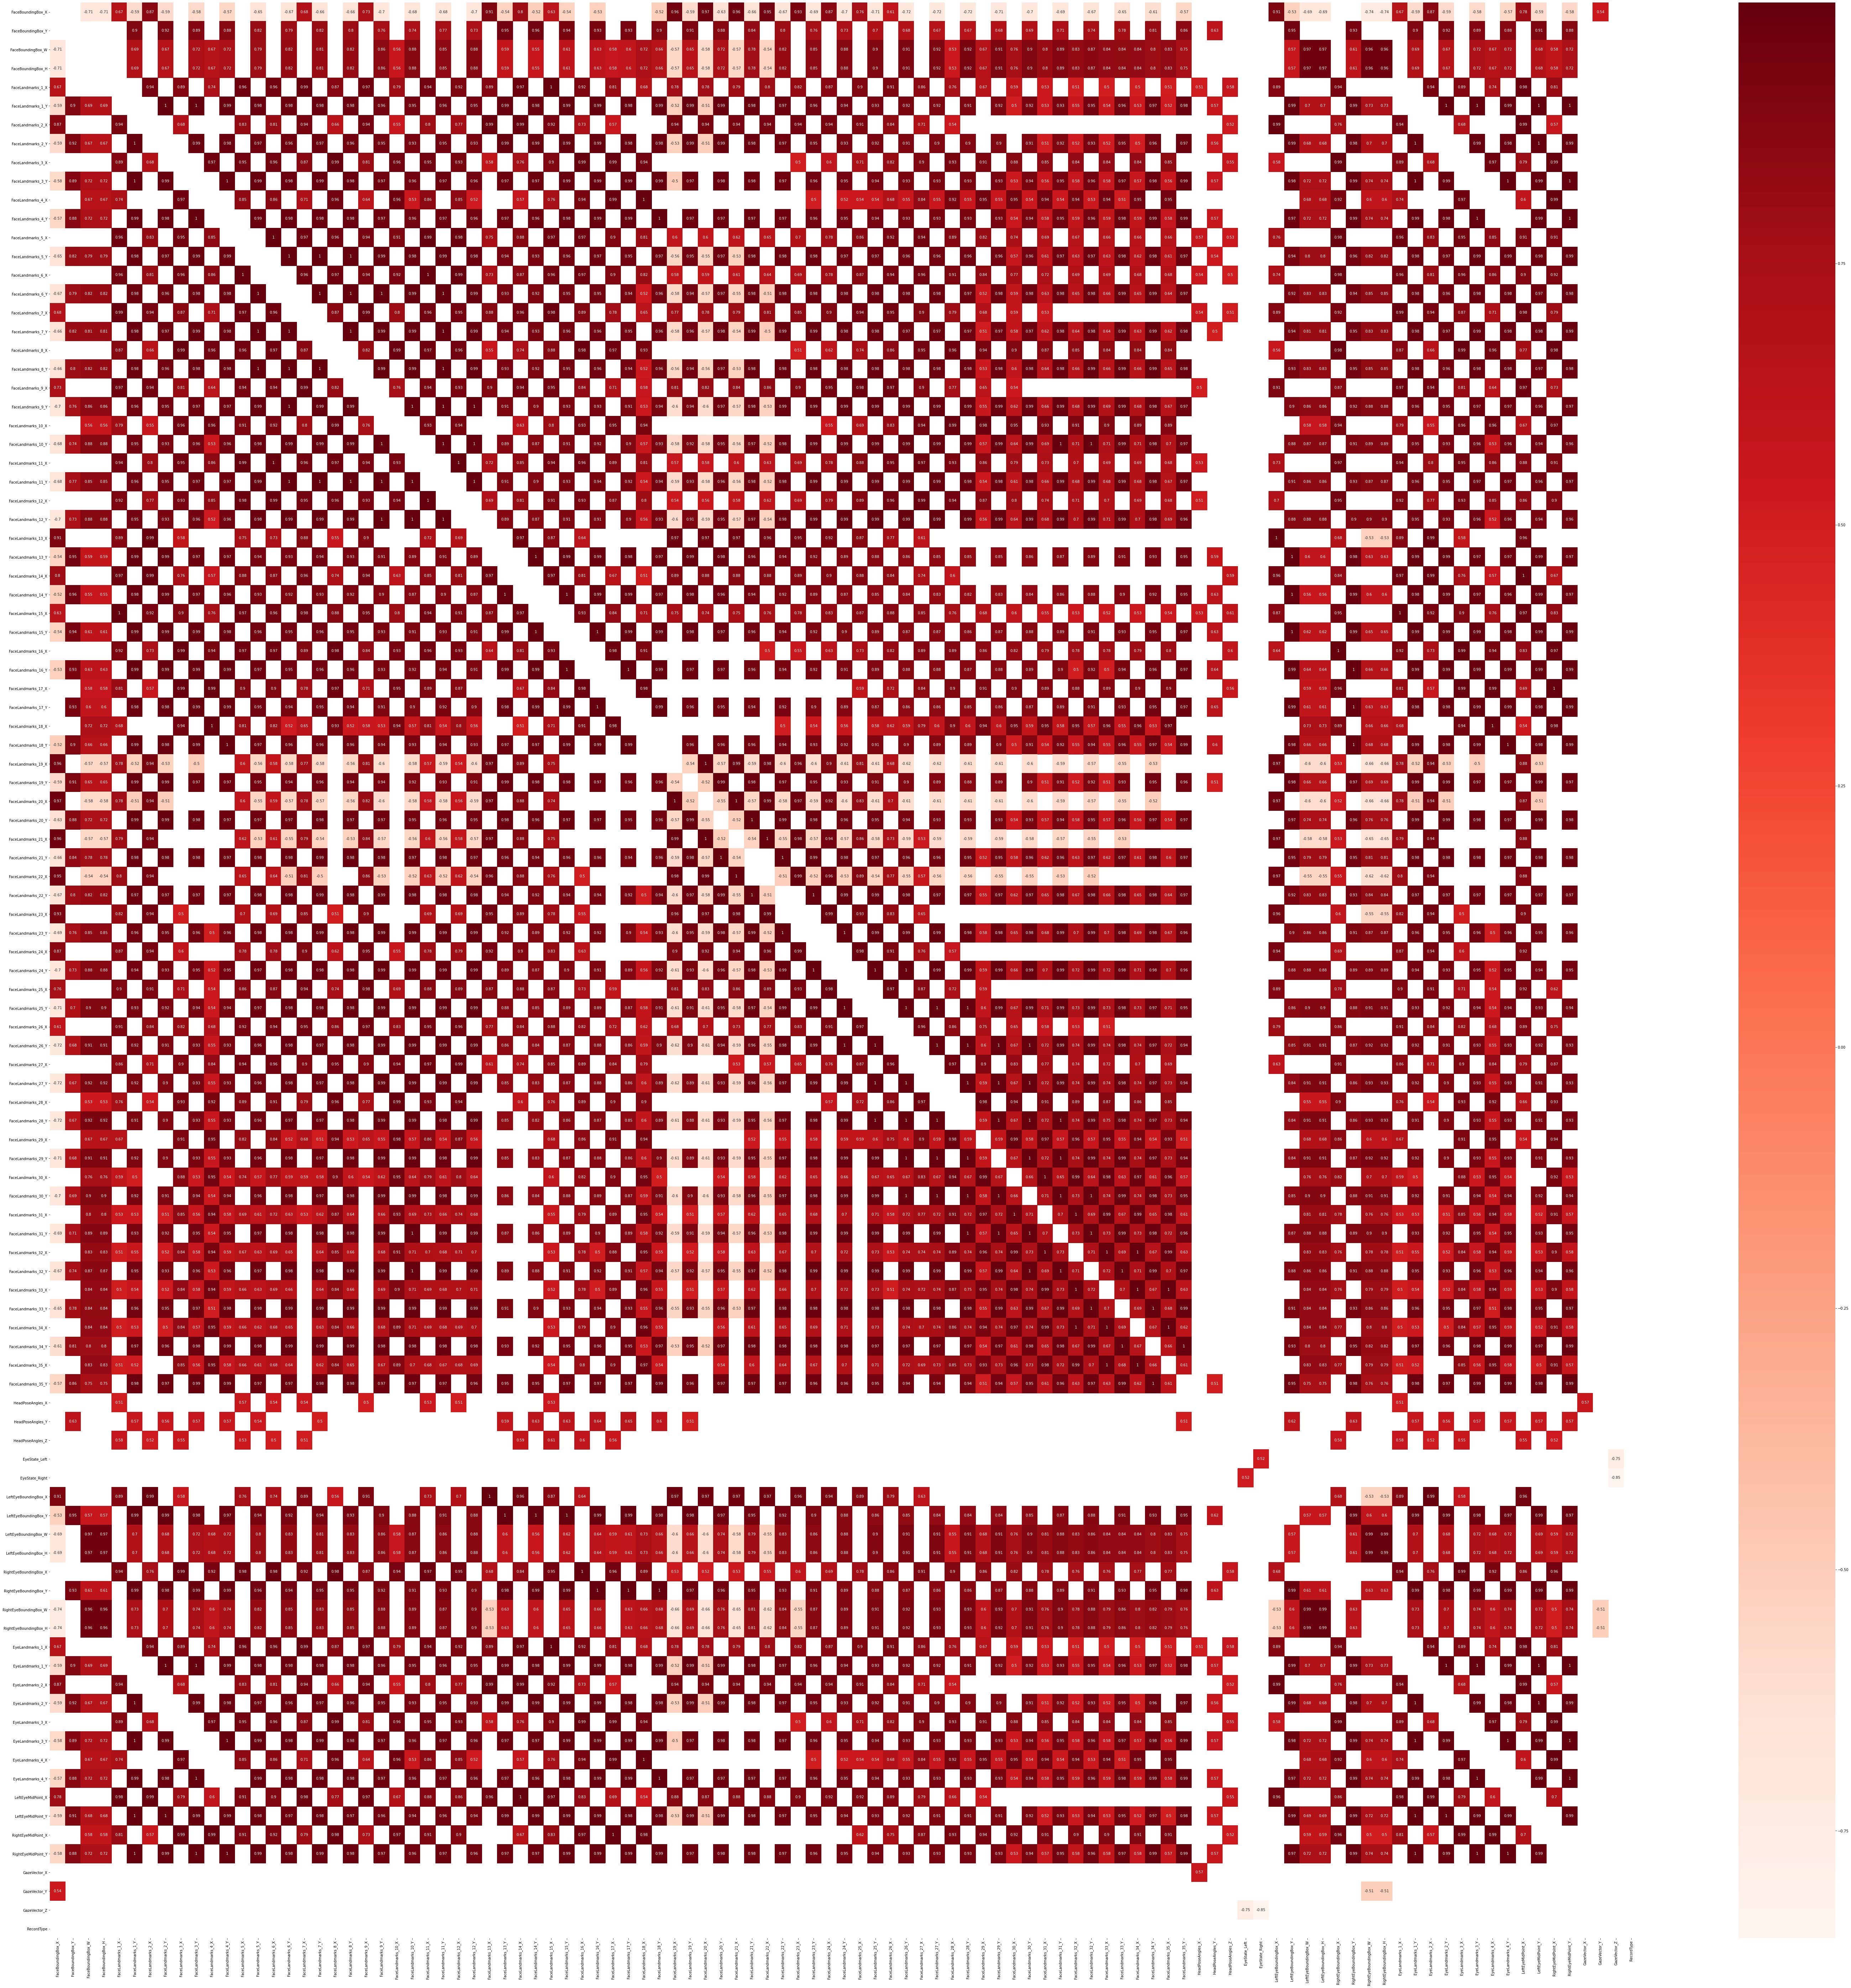

In [10]:
dfCorr = data.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(100,100))
seaborn.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

## Normalize coordinates

#### Normalized [Landmark,BoundingBox ]represents a point with x, y coordinates. x and y are normalized to [0.0, 1.0] by the image width and height respectively.

### Grab X , Y colums  then normalizing scale

In [11]:
n_x_col=data.columns[data.columns.str.contains('X') &
                     (data.columns.str.contains('FaceLandmarks')|(data.columns.str.contains('BoundingBox')))]

n_y_col=data.columns[data.columns.str.contains('Y') &
                     (data.columns.str.contains('FaceLandmarks')|(data.columns.str.contains('BoundingBox')))]

In [12]:
n_data=data.copy()
for col in n_x_col:
    n_data[col]=n_data[col]/1280
for col in n_y_col:
    n_data[col]=n_data[col]/720    

## Draw noromalized data corr heatmap

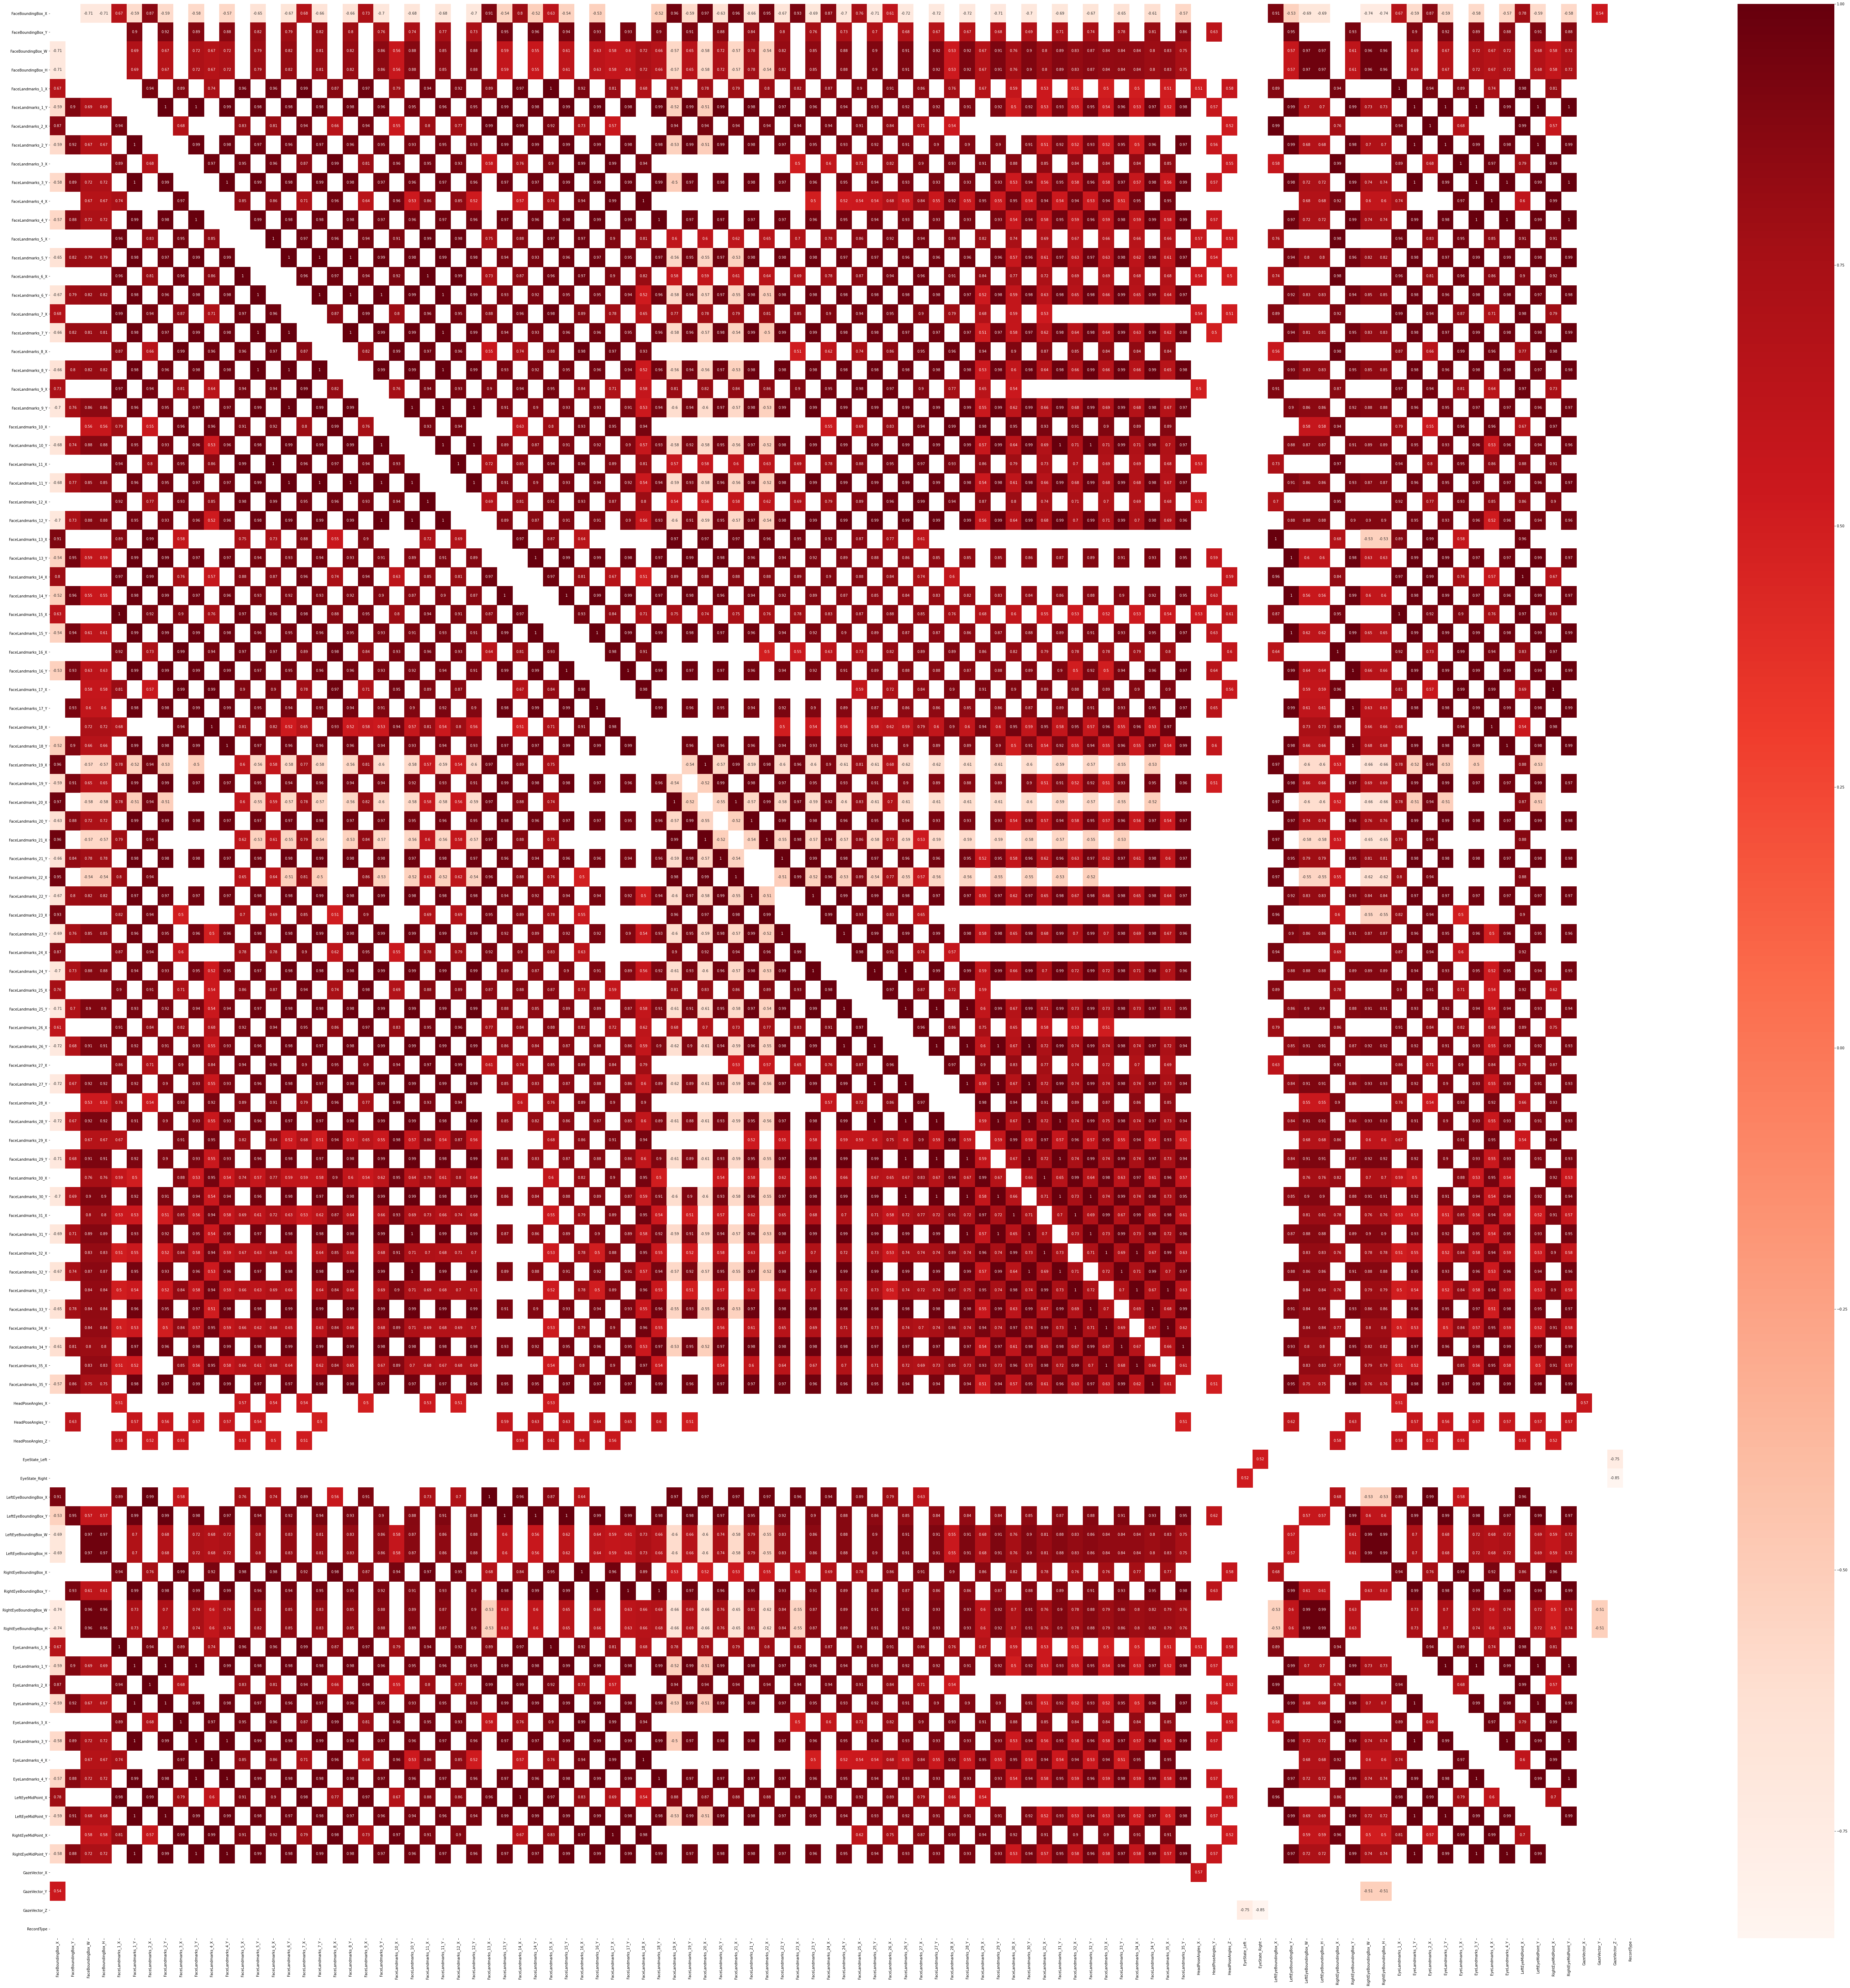

In [13]:
dfCorr = n_data.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(100,100))
seaborn.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

## Check corr between 'RecordType' to all columns 

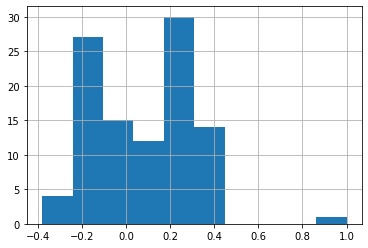

In [14]:
n_data.corrwith(n_data['RecordType']).hist()

### Use T-SNE reduce dimension

In [17]:
X=data.iloc[:,1:-2].values
y=data['RecordType'].values

In [18]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,init='random', perplexity=3).fit_transform(X)
X_embedded.shape

(7361, 2)

### Draw T-SNE 2D plot

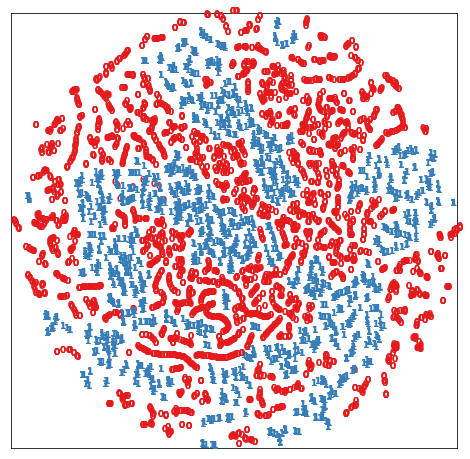

In [19]:
#Data Visualization
x_min, x_max = X_embedded.min(0), X_embedded.max(0)
X_norm = (X_embedded - x_min) / (x_max - x_min)  #Normalize
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()